## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
import warnings;warnings.filterwarnings(action='ignore')

## Read data

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [3]:
print('학습데이터 수:', train.shape)
print('평가데이터 수:', test.shape)

학습데이터 수: (252289, 19)
평가데이터 수: (79786, 18)


In [4]:
'''
데이터 설명
- sessionID : 세션 ID
- userID : 사용자 ID
- TARGET : 세션에서 발생한 총 조회수
- browser : 사용된 브라우저
- OS : 사용된 기기의 운영체제
- device : 사용된 기기
- new : 첫 방문 여부 (0: 첫 방문 아님, 1: 첫 방문)
- quality : 세션의 질 (거래 성사를 기준으로 측정된 값, 범위: 1~100)
- duration : 총 세션 시간 (단위: 초)
- bounced : 이탈 여부 (0: 이탈하지 않음, 1: 이탈함)
- transaction : 세션 내에서 발생의 거래의 수
- transaction_revenue : 총 거래 수익
- continent : 세션이 발생한 대륙
- subcontinent : 세션이 발생한 하위 대륙
- country : 세션이 발생한 국가
- traffic_source : 트래픽이 발생한 소스
- traffic_medium : 트래픽 소스의 매체
- keyword : 트래픽 소스의 키워드, 일반적으로 traffic_medium이 organic, cpc인 경우에 설정
- referral_path : traffic_medium이 referral인 경우 설정되는 경로
'''
display(train.head())

,sessionID,userID,TARGET,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,SESSION_000000,USER_000000,17.0,Chrome,Macintosh,desktop,0,45.0,839.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
1,SESSION_000001,USER_000001,3.0,Chrome,Windows,desktop,1,1.0,39.0,0,0.0,0.0,Europe,Western Europe,Germany,google,organic,Category8,NaN
2,SESSION_000002,USER_000002,1.0,Samsung Internet,Android,mobile,1,1.0,0.0,1,0.0,0.0,Asia,Southeast Asia,Malaysia,(direct),(none),NaN,NaN
3,SESSION_000003,USER_000003,1.0,Chrome,Macintosh,desktop,1,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,Partners,affiliate,NaN,NaN
4,SESSION_000004,USER_000004,1.0,Chrome,iOS,mobile,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,groups.google.com,referral,NaN,Category6_Path_0000


## Correlation with TARGET

In [5]:
# userID는 제외한다.
numeric = ['quality','duration','transaction','transaction_revenue']
category = ['browser', 'OS', 'device', 'new','bounced','continent', 'subcontinent', 'country',
            'traffic_source','traffic_medium', 'keyword', 'referral_path']

<Figure size 1440x1440 with 0 Axes>

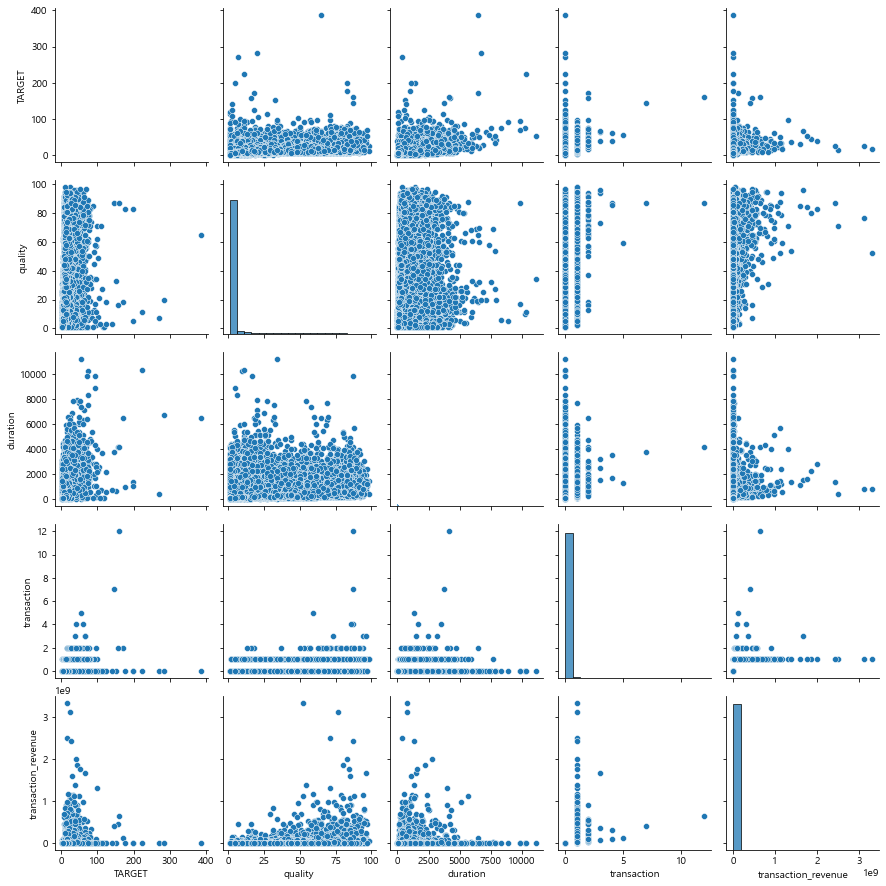

In [6]:
# 수치형 주요 변수들간 pairplot을 그려본다.
plt.figure(figsize=(20,20))
sns.pairplot(train[['TARGET']+numeric], palette='forestgreen')
plt.show()

In [7]:
# 범주형 변수간 TARGET의 표준편차를 확인한다. 변동이 없는 변주를 찾기 위함이다.
# bounced가 1일 때 TARGET의 표준편차는 0이다.
for col in category:
    display(train.groupby(col)['TARGET'].agg([np.mean, np.std, np.size]).sort_values(by='std').iloc[:30])

,mean,std,size
browser,,,
DESKTOP,1.000000,0.000000,5
Mozilla,1.000000,0.000000,3
Konqueror,1.000000,0.000000,3
Iron,1.000000,0.000000,4
Apple-iPhone7C2,1.000000,0.000000,2
YE,5.000000,0.000000,2
Seznam,1.000000,0.000000,2
BlackBerry,1.384615,0.506370,13
SeaMonkey,1.500000,0.577350,4


,mean,std,size
OS,,,
Firefox OS,1.250000,0.500000,4
FreeBSD,1.333333,0.577350,3
BlackBerry,1.620690,1.424625,29
Tizen,1.816199,1.704915,321
Samsung,2.050193,2.106052,259
OS/2,2.111111,2.290075,36
(not set),2.045910,2.330270,2592
Windows Phone,2.437500,2.816571,128
Nintendo 3DS,5.666667,4.179314,6


,mean,std,size
device,,,
mobile,2.970494,4.715325,76460
desktop,3.879407,5.788102,167133
tablet,3.550943,6.022380,8696


,mean,std,size
new,,,
1,3.381857,5.125916,189710
0,4.231579,6.494463,62579


,mean,std,size
bounced,,,
1,1.000000,0.00000,124548
0,6.120447,6.85611,127741


,mean,std,size
continent,,,
Africa,2.274967,2.772075,10514
Asia,2.760104,4.474850,57254
Europe,2.774596,4.634260,53748
(not set),3.252976,4.677510,336
Oceania,3.243958,4.867743,3931
Americas,4.438208,6.281257,126506


,mean,std,size
subcontinent,,,
Western Africa,2.132927,2.340894,1971
Middle Africa,2.157895,2.402890,190
Northern Africa,2.304120,2.770294,5534
Eastern Africa,2.274809,2.820451,655
Southern Africa,2.340111,3.129039,2164
Western Asia,2.466067,3.517292,7677
Micronesian Region,3.388889,3.583276,18
Melanesia,3.000000,3.590110,10
Southern Asia,2.656825,4.006383,21744


,mean,std,size
country,,,
U.S. Virgin Islands,1.000000,0.000000,2
Grenada,2.000000,0.000000,2
St. Martin,1.000000,0.000000,2
New Caledonia,1.000000,0.000000,3
Djibouti,1.166667,0.408248,6
French Guiana,1.200000,0.447214,5
Monaco,1.333333,0.577350,3
Niger,1.363636,0.657952,22
Andorra,1.461538,0.660225,13


,mean,std,size
traffic_source,,,
online.fullsail.edu,1.000000,0.000000,3
web.facebook.com,1.000000,0.000000,2
kik.com,1.000000,0.000000,2
google.com.sa,1.000000,0.000000,2
search.mysearch.com,1.000000,0.000000,2
web.whatsapp.com,1.250000,0.500000,4
google.co.th,3.400000,0.547723,5
mx.search.yahoo.com,1.500000,0.577350,4
myasucourses.asu.edu,1.454545,0.687552,11


,mean,std,size
traffic_medium,,,
(not set),1.500000,0.547723,6
referral,2.514340,4.010136,70047
cpm,3.047904,4.424670,501
affiliate,3.113327,4.650281,5365
cpc,2.911606,4.929838,9978
organic,3.842656,5.621129,107370
(none),4.581021,6.661280,59022


,mean,std,size
keyword,,,
Category2_Keyword_504,1.0,0.0,2
Category2_Keyword_528,1.0,0.0,2
Category2_Keyword_518,1.0,0.0,2
Category2_Keyword_503,1.0,0.0,2
Category2_Keyword_487,1.0,0.0,2
Category2_Keyword_483,1.0,0.0,2
Category2_Keyword_026,1.0,0.0,3
Category2_Keyword_482,1.0,0.0,2
Category2_Keyword_421,1.0,0.0,2


,mean,std,size
referral_path,,,
Category6_Path_1159,1.0,0.0,2
Category13_Path_1444,1.0,0.0,2
Category11_Path_1347,1.0,0.0,2
Category13_Path_1321,1.0,0.0,2
Category11_Path_1368,1.0,0.0,2
Category11_Path_1447,1.0,0.0,2
Category11_Path_1454,1.0,0.0,2
Category11_Path_0730,1.0,0.0,5
Category11_Path_0348,1.0,0.0,2


### Split data
이탈 여부간 TARGET 차이로 이탈 데이터인지 아닌지로 데이터를 구분해 모델을 학습시킨다.

In [8]:
stayed_train = train.query('bounced != 1')
stayed_train.drop(['bounced'], axis=1, inplace=True)
display(stayed_train)

# test도 동일하게 분류한다.
stayed_test = test.query('bounced != 1')
stayed_test.drop(['bounced'], axis=1, inplace=True)

,sessionID,userID,TARGET,browser,OS,device,new,quality,duration,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,SESSION_000000,USER_000000,17.0,Chrome,Macintosh,desktop,0,45.0,839.0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
1,SESSION_000001,USER_000001,3.0,Chrome,Windows,desktop,1,1.0,39.0,0.0,0.0,Europe,Western Europe,Germany,google,organic,Category8,NaN
7,SESSION_000007,USER_000007,5.0,Chrome,Macintosh,desktop,1,1.0,64.0,0.0,0.0,Europe,Western Europe,Germany,google,organic,Category8,NaN
8,SESSION_000008,USER_000008,5.0,Firefox,Linux,desktop,1,1.0,60.0,0.0,0.0,Americas,South America,Brazil,youtube.com,referral,NaN,Category5_Path_0002
9,SESSION_000009,USER_000009,3.0,Chrome,Macintosh,desktop,1,2.0,579.0,0.0,0.0,Americas,Northern America,United States,google,cpc,Category1_Keyword_000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252281,SESSION_252281,USER_206018,6.0,Chrome,Macintosh,desktop,1,1.0,99.0,0.0,0.0,Asia,Eastern Asia,Hong Kong,google,organic,Category8,NaN
252282,SESSION_252282,USER_206019,3.0,Chrome,Macintosh,desktop,1,2.0,1423.0,0.0,0.0,Americas,Northern America,United States,google,organic,NaN,NaN
252286,SESSION_252286,USER_164240,5.0,Chrome,Macintosh,desktop,0,2.0,69.0,0.0,0.0,Americas,Northern America,United States,(direct),(none),NaN,Category1
252287,SESSION_252287,USER_206023,1.0,Android Webview,Android,mobile,1,1.0,28.0,0.0,0.0,Africa,Northern Africa,Egypt,youtube.com,referral,NaN,Category2_Path_0018


In [9]:
stayed_train.to_csv('../data/stayed_train.csv', index=False)
stayed_test.to_csv('../data/stayed_test.csv', index=False)

In [10]:
# submission file을 변경한다.
sample = pd.read_csv('../data/submission/sample_submission.csv')
sample.loc[test.query('bounced==1').index, 'TARGET'] = 1
display(sample.TARGET.value_counts(dropna=False))

0    40148
1    39638
Name: TARGET, dtype: int64

In [11]:
# 이탈 데이터면 반드시 TARGET이 1이도록 설정한다.
sample.to_csv('../data/submission/sample_submission.csv', index=False)